In [40]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from math import log
from matplotlib import cm
from sympy import symbols, diff
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example  -4 Data visualization with 3D charts


## Minimise $$ f(x,y) = \frac{1}{3{-x^2-y^2} + 1} $$
## Minimise $$ f(x,y) = \frac{1} {r+1}$$ where r is $3^{-x^2-y^2}$

In [41]:
def f(x,y):
    r=3**(-x**2-y**2)
    return 1/(r+1)

In [42]:
#Making our X & Y data
x_4 = np.linspace(start=-2,stop=2,num=200)
y_4 = np.linspace(start=-2,stop=2,num=200)
print ('Shape of x array',x_4.shape)
#x_4 and y_4 are now 1 Dimentional only, to be plotted in 3d chard they must be 2 Dimentional.
#for that,
x_4,y_4 = np.meshgrid(x_4,y_4)
print('Shape of x array after mesh', x_4.shape)

Shape of x array (200,)
Shape of x array after mesh (200, 200)


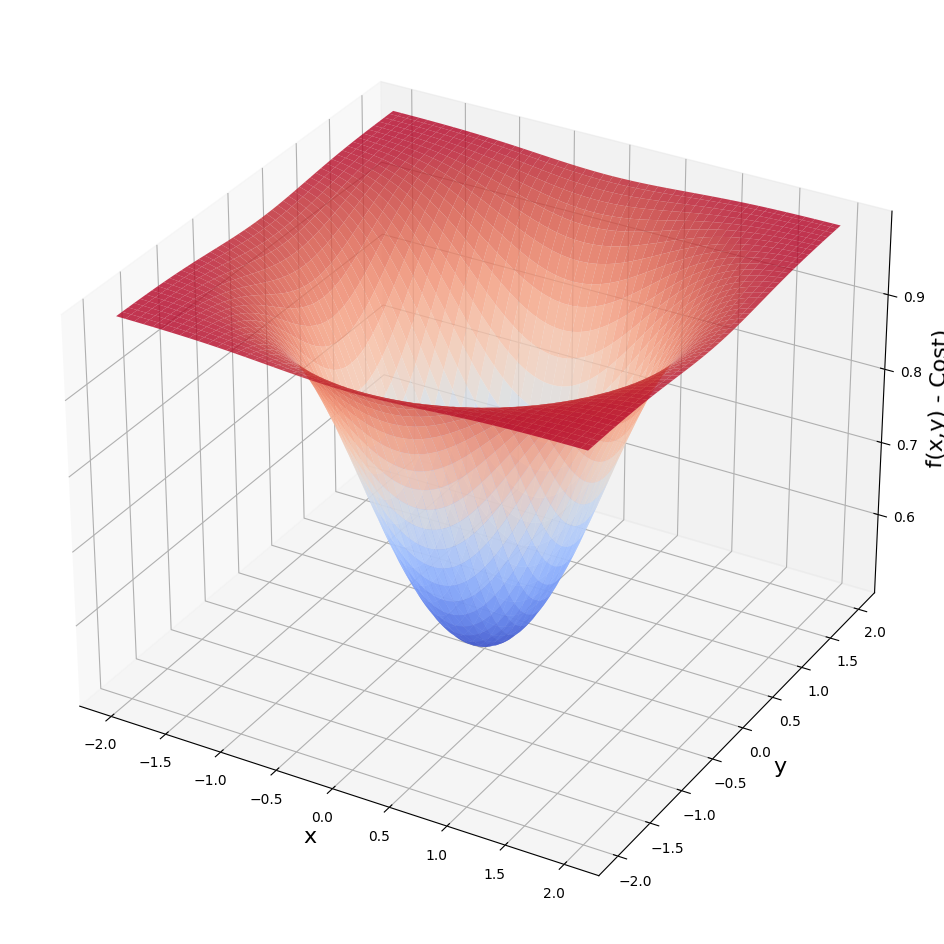

In [43]:
#Generating 3D plot
fig = plt.figure(figsize=[16,12])
# ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel('y',fontsize=16)
ax.set_zlabel('f(x,y) - Cost)',fontsize=16)
ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap = cm.coolwarm, alpha = 0.8)
plt.show()

# Partial Derivatives and Symbolic Computation

In [44]:
a,b= symbols('x,y')
#it means a stands for x, and b for y..

In [45]:
print (f(a,b))
#prints the equation wih the symbols 'x' and 'y'

1/(3**(-x**2 - y**2) + 1)


In [46]:
print (diff(f(a,b),a))
#prints the equation of the partial derivative with the symbols 'x' and 'y'

2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2


In [47]:
print(f(a,b).evalf(subs={a:1.8,b:1.0}))
#evalf - it evaluate and substitute x & y into our function.
#subs={a:1.8,b:1.0} , value of 'x' & 'y' at which you want to find the evaluate the cost
#a is the key, 1.8 is the value... A python dictionary, python gives both of a & b values at the same time
#Print the value of cost / f(x,y) at x=1.8 and y=1.0

0.990604794032582


In [48]:
print (diff(f(a,b),a).evalf(subs={a:1.8, b:1.0}))
#Print the value of partial derivative with respect to X.

0.0368089716197505


# Batch Gradient Descent with Sympy

In [49]:
#LET'S GOOOOO
multiplier = 0.1
max_iter = 400
params = np.array([1.8,1.0])
for n in range (max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
print ('values in gradient array', gradients)
print ('minimum occurs at x value of :', params[0])
print ('minimum occurs at y value of :', params[1])
print ('the cost is:', f(params[0],params[1]))

values in gradient array [5.71287516047952e-9 3.17381953359973e-9]
minimum occurs at x value of : 9.82887861973314e-9
minimum occurs at y value of : 5.46048812207397e-9
the cost is: 0.500000000000000


# Batch Gradient Descent without Sympy
### Loops and Consideration of performance

# $$\frac{\partial f}{\partial x}$$

### For x,

# $$\frac{\partial f}{\partial x} = 2x\ln(3)*3^{-x^2-y^2}$$

### In case of ' * ' we can use \cdot , so we get ' . ' in the equation

# $$\frac{\partial f}{\partial x} = 2x\ln(3)\cdot3^{-x^2-y^2}$$

### For y,

# $$\frac{\partial f}{\partial y} = 2y\ln(3)*3^{-x^2-y^2}$$

In [50]:
#TO replace sympy, fisrt we make function fpx and fpy that we can use in place of   -diff(f(a,b),.........

def fpx(x,y):
    r=3**(-x**2-y**2)
    return 2*x*log(3)*r/(r+1)**2
def fpy(x,y):
    r=3**(-x**2-y**2)
    return 2*y*log(3)*r/(r+1)**2

In [51]:
multiplier = 0.1
max_iter = 400
params = np.array([1.8,1.0])
for n in range (max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
print ('values in gradient array', gradients)
print ('minimum occurs at x value of :', params[0])
print ('minimum occurs at y value of :', params[1])
print ('the cost is:', f(params[0],params[1]))
#This program runs 5x faster than the previous

values in gradient array [5.71287516e-09 3.17381953e-09]
minimum occurs at x value of : 9.828878619733109e-09
minimum occurs at y value of : 5.460488122073948e-09
the cost is: 0.5


# Graphing 3D Gradient Descent and Advanced Numpy Arrays

In [52]:
params = np.array([1.8,1.0])
values_array = params.reshape(1,2)
print (values_array.shape)
kirk = np.array([['captain', 'Guitar']])
print (kirk.shape)

(1, 2)
(1, 2)


In [53]:
hs_band = np.array([['Blackthought', 'MC'],['Questlove','MC']])
print (hs_band.shape)

(2, 2)


In [54]:
print ('hs_band[0]:', hs_band[0])
print ('hs_band[1][0]:',hs_band[1][0])

hs_band[0]: ['Blackthought' 'MC']
hs_band[1][0]: Questlove


In [55]:
the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots.shape)
print(the_roots)

(3, 2)
[['Blackthought' 'MC']
 ['Questlove' 'MC']
 ['captain' 'Guitar']]


In [56]:
print('Printing nicknames..', the_roots[:,0])

Printing nicknames.. ['Blackthought' 'Questlove' 'captain']


In [57]:
the_roots = np.append(arr=the_roots, values=[['malik','MC']],axis=0)
print('printing band roles', the_roots[:,1])

printing band roles ['MC' 'MC' 'Guitar' 'MC']


## Graphing 3D gradient descent with scatter points

values in gradient array [0.13086082 0.07270045]
minimum occurs at x value of : 0.22554260634177148
minimum occurs at y value of : 0.12530144796765078
the cost is: 0.518275488025232


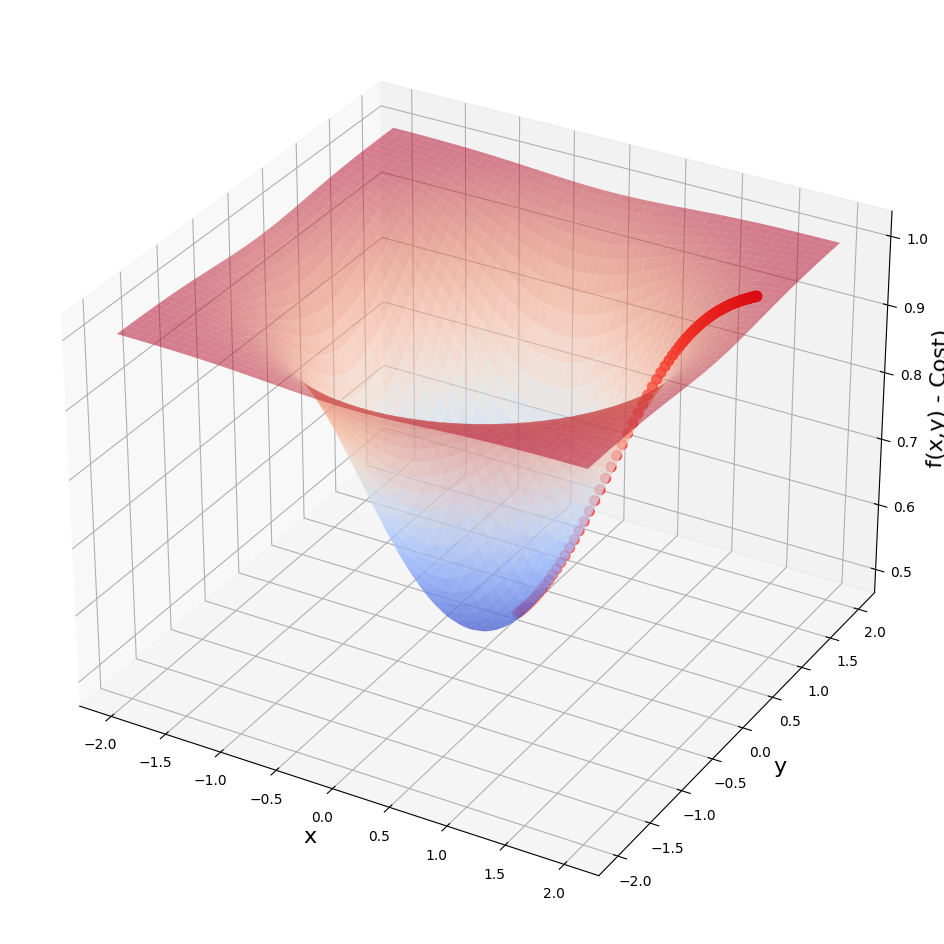

In [58]:
multiplier = 0.1
max_iter = 100
params = np.array([1.8,1.0])
for n in range (max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array=np.append(arr= values_array, values=params.reshape(1,2), axis=0)
    #or
    #values_array=np.concatenate((values_array, params.reshape(1,2)), axis=0)
print ('values in gradient array', gradients)
print ('minimum occurs at x value of :', params[0])
print ('minimum occurs at y value of :', params[1])
print ('the cost is:', f(params[0],params[1]))

#Generating 3D plot
fig = plt.figure(figsize=[16,12])
# ax = Axes3D(fig)
x_val = values_array[:,0]
y_val = values_array[:,1]
z_val = f(values_array[:,0],values_array[:,1])
ax = plt.axes(projection='3d')
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel('y',fontsize=16)
ax.set_zlabel('f(x,y) - Cost)',fontsize=16)
ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap = cm.coolwarm, alpha = 0.5)
ax.scatter(x_val, y_val, z_val, s=50, color='red')
plt.show()

# Mean Squared Error

## Working with Data and a real cost function

## Mean squared Error: a cost funtion for regression problems

## $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2$$

## $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2$$

## $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2$$

## Transporting & Reshaping Arrays

In [59]:
#Making sample data
x_5 = np.array([0.1,1.2,2.4,3.2,4.1,5.7,6.5])
y_5 = np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2])
print('shape of x_5 array:', x_5.shape)
print('shape of y_5 array:', y_5.shape)
#it is only 1d, which doesn't work

shape of x_5 array: (7,)
shape of y_5 array: (7,)


In [60]:
#making x_5 and y_5 2d
x_5 = np.array([0.1,1.2,2.4,3.2,4.1,5.7,6.5]).reshape(7,1)
y_5 = np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2]).reshape(7,1)
#both reshape and transpose works but the traspose automatically works

In [61]:
regression = LinearRegression()
regression.fit(x_5,y_5)
print ('theta 0:', regression.intercept_[0])
print ('theta 1:', regression.coef_[0][0])

theta 0: 0.8475351486029554
theta 1: 1.222726463783591


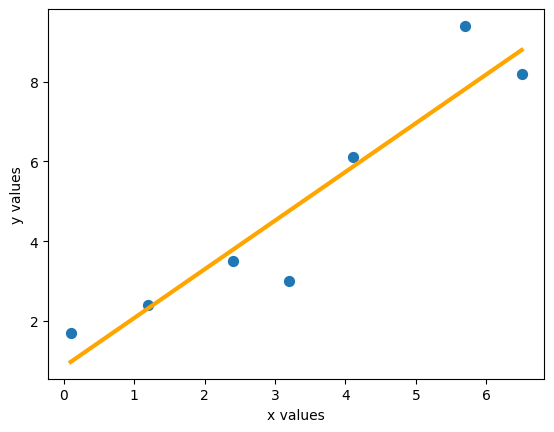

In [62]:
# plottting in the graph
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regression.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

### Implementing a MSE cost function

In [63]:
#y_hat = intercept + slope * x
#y_hat = theta0 + theta1 * x
y_hat = 0.8475351486029554 + 1.222726463783591 * x_5
print ('Estimated y-values (y_hat) \n', y_hat)
#comparing the y_hat and y values
print ('Incomparision, the real y-values \n', y_5)

Estimated y-values (y_hat) 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Incomparision, the real y-values 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [64]:
# making a functiom to return MSE with y and y_hat
def mse(y,y_hat):
    #mse_calc = 1/7 * sum((y-y_hat)**2)
    #or
    #mse_calc = (1/y.size) * sum((y-y_hat)**2)
    #or
    mse_calc = np.average((y-y_hat)**2, axis=0)
    return mse_calc

In [65]:
print (mse(y_5,y_hat))

[0.94796558]


In [66]:
#we can also automatically calculate with the builtin function mean_squared_error from sklearn.metrics
print ('Manually calculating mse',mse(y_5,y_hat))
print ('mse regression using manual calc is: ',mean_squared_error(y_5,y_hat))
print ('mse regression with regr.predict is: ',mean_squared_error(y_5,regression.predict(x_5)))

Manually calculating mse [0.94796558]
mse regression using manual calc is:  0.9479655759794575
mse regression with regr.predict is:  0.9479655759794575


# Visualising the MSE and Nested for-loops

## 3D plot for MSE function

In [67]:
#making data for thetas
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
#as it th_0 and th_1 are 1d we make them 2d using meshgrid
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)
print(th_0.shape, th_1.shape)
print(th_0, th_1)
print(plot_t0.shape, plot_t1.shape)
print('\n',plot_t0)
print('\n',plot_t1)
#we calculate all the combination og theta0 and theta1. We start with 2d array of just 0,
#then we calculate MSE for each value in the array

(200,) (200,)
[-1.         -0.9798995  -0.95979899 -0.93969849 -0.91959799 -0.89949749
 -0.87939698 -0.85929648 -0.83919598 -0.81909548 -0.79899497 -0.77889447
 -0.75879397 -0.73869347 -0.71859296 -0.69849246 -0.67839196 -0.65829146
 -0.63819095 -0.61809045 -0.59798995 -0.57788945 -0.55778894 -0.53768844
 -0.51758794 -0.49748744 -0.47738693 -0.45728643 -0.43718593 -0.41708543
 -0.39698492 -0.37688442 -0.35678392 -0.33668342 -0.31658291 -0.29648241
 -0.27638191 -0.25628141 -0.2361809  -0.2160804  -0.1959799  -0.1758794
 -0.15577889 -0.13567839 -0.11557789 -0.09547739 -0.07537688 -0.05527638
 -0.03517588 -0.01507538  0.00502513  0.02512563  0.04522613  0.06532663
  0.08542714  0.10552764  0.12562814  0.14572864  0.16582915  0.18592965
  0.20603015  0.22613065  0.24623116  0.26633166  0.28643216  0.30653266
  0.32663317  0.34673367  0.36683417  0.38693467  0.40703518  0.42713568
  0.44723618  0.46733668  0.48743719  0.50753769  0.52763819  0.54773869
  0.5678392   0.5879397   0.6080402   

In [68]:
plot_cost = np.zeros ((nr_thetas,nr_thetas))
print(plot_cost)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Calculating MSE using nested for loops

In [69]:
for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        plot_cost[i][j] = mse(y_5,y_hat)
print ('shape of plot_t0', plot_t0.shape, '\n plot_t0: \n', plot_t0)
print ('shape of plot_t1', plot_t1.shape, '\n plot_t1: \n', plot_t1)
print ('shape of plot_cost', plot_cost.shape, '\n plot_cost: \n', plot_cost)

shape of plot_t0 (200, 200) 
 plot_t0: 
 [[-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]
 [-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]
 [-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]
 ...
 [-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]
 [-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]
 [-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]]
shape of plot_t1 (200, 200) 
 plot_t1: 
 [[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-0.9798995  -0.9798995  -0.9798995  ... -0.9798995  -0.9798995
  -0.9798995 ]
 [-0.95979899 -0.95979899 -0.95979899 ... -0.95979899 -0.95979899
  -0.95979899]
 ...
 [ 2.95979899  2.95979899  2.95979899 ...  2.95979899  2.95979899
   2.95979899]
 [ 2.9798995   2.9798995   2.9798995  ...  2.9798995   2.9798995
   2.9798995 ]
 [ 3.          3.          3.   

### Plotting MSE

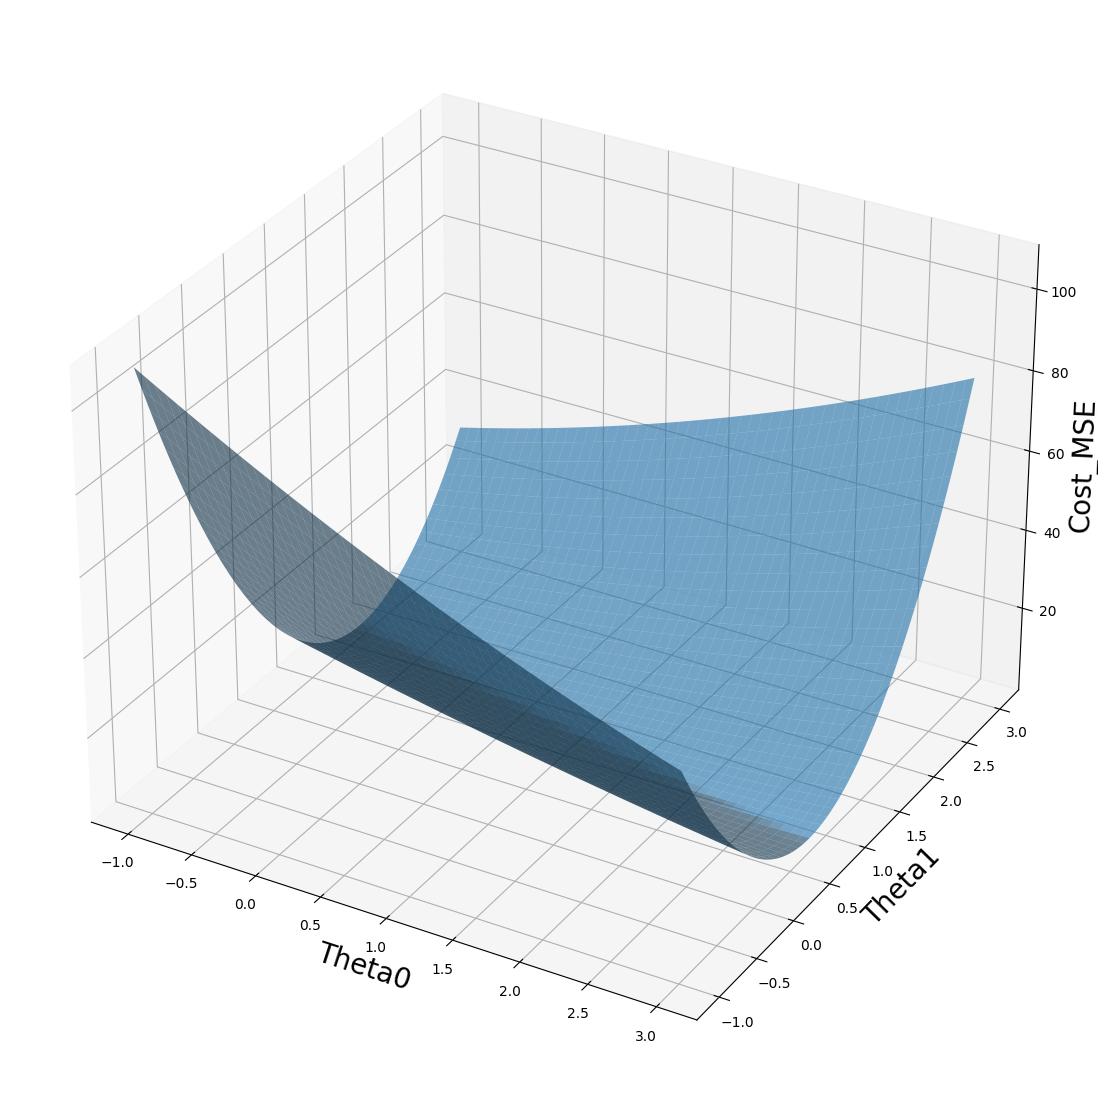

In [70]:
fig = plt.figure(figsize =[16,14])
ax = plt.axes(projection = '3d')
ax.set_xlabel('Theta0', fontsize=20)
ax.set_ylabel('Theta1', fontsize=20)
ax.set_zlabel('Cost_MSE', fontsize=20)
ax.plot_surface(plot_t0, plot_t1, plot_cost, alpha=0.6)
plt.show()
#increasing nr_theta increases datas which makes the graph smooth

In [71]:
print ('min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print ('min occurs at (i,j):', ij_min)
print ('min MSE for theta0 at plot_t0', plot_t0[111][91])
print ('min MSE for theta0 at plot_t1', plot_t1[111][91])

min value of plot_cost 0.9483826526747164
min occurs at (i,j): (111, 91)
min MSE for theta0 at plot_t0 0.829145728643216
min MSE for theta0 at plot_t1 1.2311557788944723


## Partial Derivatives of MSE with respect to $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) x^{(i)} \big) $$

# MSE and Gradient Descent

In [72]:
#x values, y values, array of theta parameters(theta0 at index0 and theta1 at index1 )
def grad(x,y,thetas):
    n=y.size
    #creating slope of theta0 and theta1
    theta0_slope = (-2/n)*sum(y-thetas[0]-thetas[1]*x)
    theta1_slope = (-2/n)*sum((y-thetas[0]-thetas[1]*x)*x)
    return np.array([theta0_slope[0], theta1_slope[0]])

In [73]:
multiplier = 0.01
thetas = np.array([2.9,2.9])
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0]+thetas[1]*x_5)
#We now collect data for scatter plots
for i in range(1000):
    thetas = thetas - multiplier*grad(x_5,y_5,thetas)
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(mse_vals, mse(y_5,thetas[0]+thetas[1]*x_5))
print ('min occurs at thetas0:', thetas[0])
print ('min occurs at thetas1:', thetas[1])
print ('MSE is:', mse(y_5, thetas[0]+thetas[1]*x_5))

min occurs at thetas0: 0.8532230461743415
min occurs at thetas1: 1.2214935332607393
MSE is: [0.94797511]


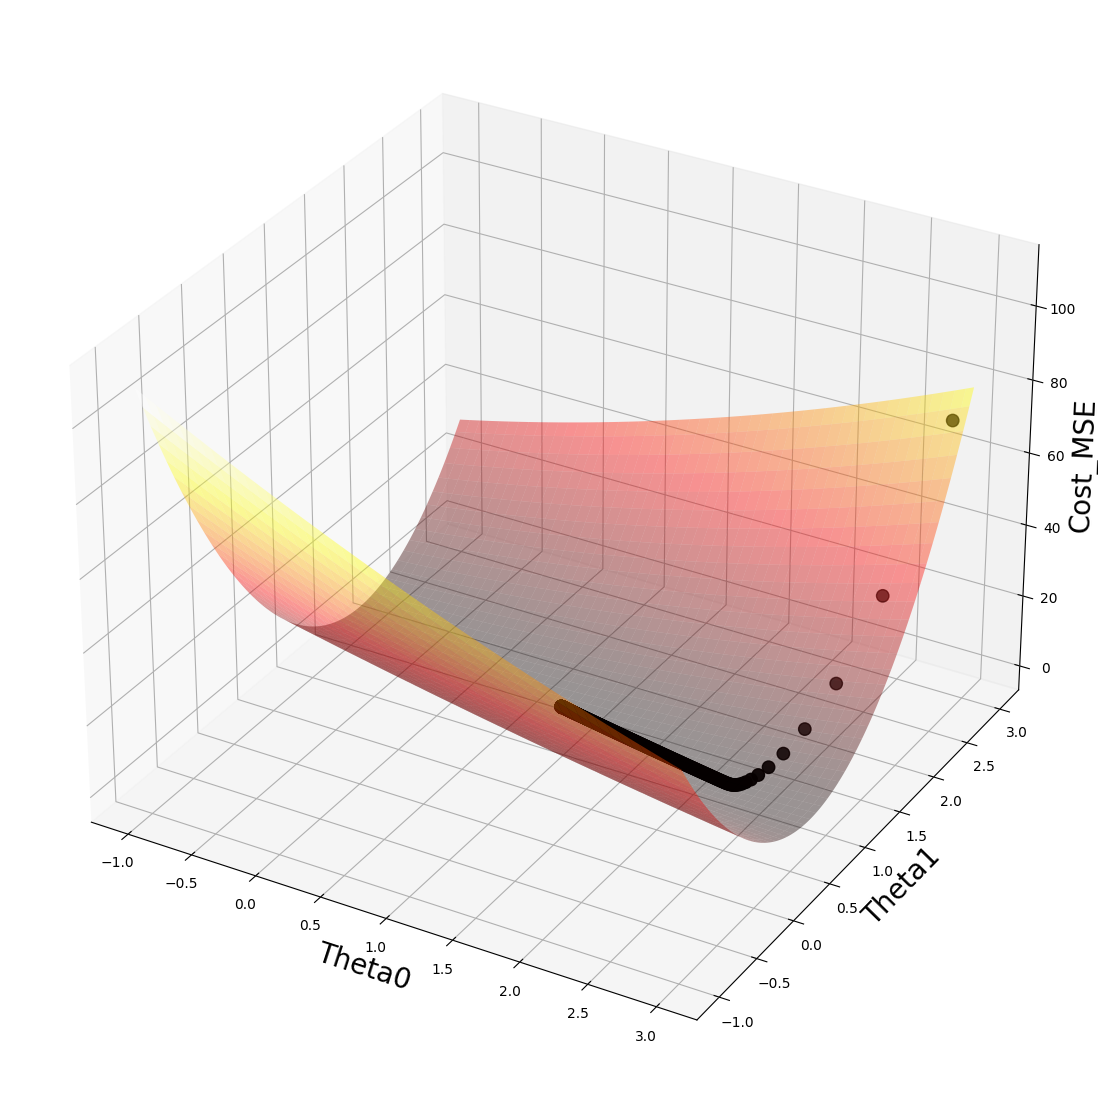

In [82]:
#plotting scatter points
fig = plt.figure(figsize =[16,14])
ax = plt.axes(projection = '3d')
ax.set_xlabel('Theta0', fontsize=20)
ax.set_ylabel('Theta1', fontsize=20)
ax.set_zlabel('Cost_MSE', fontsize=20)
ax.plot_surface(plot_t0, plot_t1, plot_cost, alpha=0.4, cmap=cm.hot)
ax.scatter(plot_vals[:,0],plot_vals[:,1],mse_vals, s=80, color='black')
plt.show()
#increasing nr_theta increases datas which makes the graph smooth